In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

# Data Wrangling

In [2]:
# Store csv files in respective variables
file1 = 'data.csv'
file2 = 'spotify_data.csv'

In [3]:
# Read csv files + convert them to respective DataFrames
file_1921_1999_spotify = pd.read_csv(file1)
file_1921_1999_spotify = pd.DataFrame(file_1921_1999_spotify)
file_1921_1999_spotify = file_1921_1999_spotify.query('year >=1921 and year <2000')

file_2000_2023_spotify = pd.read_csv(file2)
file_2000_2023_spotify = pd.DataFrame(file_2000_2023_spotify)

In [4]:
file_1921_1999_spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
file_2000_2023_spotify.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
# Show respective shapes of DataFrames
print('The rows, columns of the file_1921_1999_spotify dataframe are:', file_1921_1999_spotify.shape)
print('The rows, columns of the file_2000_2023_spotify dataframe are:', file_2000_2023_spotify.shape)

The rows, columns of the file_1921_1999_spotify dataframe are: (128253, 19)
The rows, columns of the file_2000_2023_spotify dataframe are: (1159764, 20)


In [7]:
# Fill na values with string value of "other"
file_2000_2023_spotify.fillna(value='other', inplace=True)

In [8]:
# Convert 'duration_ms' field in file_1921_1999_spotify to minutes for readability purposes (ms to minutes)
file_1921_1999_spotify['duration_ms'] = (file_1921_1999_spotify['duration_ms']/ 60000).round(2)

# Rename fields
file_1921_1999_spotify = file_1921_1999_spotify.rename(columns = {'duration_ms':'duration_minutes', 
                                                                  'name':'track_name','artists':'artist_name'})

# Drop duplicate columns - file2 field 'release_date'
del file_1921_1999_spotify['release_date']

# Strip brackets and quotes in file1 field 'artists'
file_1921_1999_spotify['artist_name'] = file_1921_1999_spotify['artist_name'].str.strip('[]')
file_1921_1999_spotify['artist_name'] = file_1921_1999_spotify['artist_name'].str.replace("'",'')

# Round float fields so they all show two decimal places
file_1921_1999_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                        'speechiness', 'tempo', 'valence']] = file_1921_1999_spotify[['acousticness', 
                                                                                      'danceability', 'energy', 
                                                                                      'instrumentalness', 
                                                                                      'liveness', 'loudness', 
                                                                                      'speechiness', 'tempo', 
                                                                                      'valence']].round(2)

# Rearrange fields for interpretability purposes
file_1921_1999_spotify = file_1921_1999_spotify[['artist_name', 'track_name', 'duration_minutes', 'id', 'year', 
                                                 'popularity', 'explicit', 'mode', 'key', 'acousticness', 
                                                 'danceability', 'energy','instrumentalness', 'liveness', 
                                                 'loudness', 'speechiness', 'tempo', 'valence']]

In [9]:
# Convert 'duration_ms' field in file_2000_2023_spotify to minutes for readability purposes (ms to minutes) 
# + rename field
file_2000_2023_spotify['duration_ms'] = (file_2000_2023_spotify['duration_ms']/ 60000).round(2)
file_2000_2023_spotify = file_2000_2023_spotify.rename(columns = {'duration_ms':'duration_minutes'})

# Drop the first 'Unamed: 0' field and the time_signature' field as it provides no value
del file_2000_2023_spotify['Unnamed: 0']

# Round float fields so they all show two decimal places
file_2000_2023_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo']] = file_2000_2023_spotify[['danceability', 'energy', 'loudness', 
                                                                       'speechiness', 'acousticness',
                                                                       'instrumentalness', 'liveness', 'valence', 
                                                                       'tempo']].round(2)

# Rearrange fields for interpretability purposes
file_2000_2023_spotify = file_2000_2023_spotify[['artist_name', 'track_name', 'duration_minutes', 'time_signature',
                                                 'track_id', 'year', 'popularity', 'genre', 'mode', 'key', 
                                                 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                                                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

# EDA - SQL 

### Central feature overview for both csv files
- id (Id of track generated by Spotify)
- acousticness (Ranges from 0 to 1, confidence measure)
- danceability (Ranges from 0 to 1, track suitability for dancing)
- energy (Ranges from 0 to 1, the perceptual measure of intensity and activity)
- duration_minutes (Duration of track)
- instrumentalness (Ranges from 0 to 1, whether track contains vocals)
- valence (Ranges from 0 to 1, musical positivity)
- popularity (Ranges from 0 to 100)
    - Exclusive to the file_2000_2023_spotify DataFrame
- tempo (Float typically ranging from 50 to 150, tempo of the track in beats/minute (BPM)
- liveness (Ranges from 0 to 1, presence of audience in the recording)
- loudness (Float typically ranging from -60 to 0 dB)
- speechiness (Ranges from 0 to 1, presence of spoken words in the track)
- year (Release year, ranges from 1921 to 2023)
- genre
    - Exclusive to the file_2000_2023_spotify DataFrame. **This will impact genre analysis for the project.**
- explicit (0 = No explicit content, 1 = Explicit content)
    - Exclusive to the file_1921_2020_spotify DataFrame
- artist_name (List of artists mentioned)
- track_name (Name of the song)

In [11]:
from pyspark.sql import SparkSession

# Create PySpark SparkSession
spark = SparkSession.builder \
    .appName('Spark SQL Query Dataframes2') \
    .getOrCreate()
spark.sparkContext.setLogLevel('WARN') 
#spark.streams.awaitAnyTermination()

# Create PySpark DataFrame from Pandas
sparkDF_1921_1999 = spark.createDataFrame(file_1921_1999_spotify) 
sparkDF_1921_1999.printSchema()

# Show row count of sparkDF_1921_2020 DataFrame
print('There are', sparkDF_1921_1999.count(), 'rows in the DataFrame')

# Create PySpark DataFrame from Pandas
sparkDF_2000_2023 = spark.createDataFrame(file_2000_2023_spotify) 
sparkDF_2000_2023.printSchema()

# Show row count of sparkDF_2000_2023 DataFrame
print('There are', sparkDF_2000_2023.count(), 'rows in the DataFrame') 

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/05 07:52:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- duration_minutes: double (nullable = true)
 |-- id: string (nullable = true)
 |-- year: long (nullable = true)
 |-- popularity: long (nullable = true)
 |-- explicit: long (nullable = true)
 |-- mode: long (nullable = true)
 |-- key: long (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)



23/12/05 07:52:47 WARN TaskSetManager: Stage 0 contains a task of very large size (2191 KiB). The maximum recommended task size is 1000 KiB.


There are 128253 rows in the DataFrame


23/12/05 07:52:52 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


root
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- duration_minutes: double (nullable = true)
 |-- time_signature: long (nullable = true)
 |-- track_id: string (nullable = true)
 |-- year: long (nullable = true)
 |-- popularity: long (nullable = true)
 |-- genre: string (nullable = true)
 |-- mode: long (nullable = true)
 |-- key: long (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)



23/12/05 07:53:32 WARN TaskSetManager: Stage 3 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


There are 1159764 rows in the DataFrame


In [12]:
sparkDF_1921_1999.createOrReplaceTempView('file_1921_1999_spotify')
sparkDF_2000_2023.createOrReplaceTempView('file_2000_2023_spotify')

In [44]:
# Show average track duration and the average of key feature values year-over-year - file_2000_2023_spotify
sparkDF_2000_2023 = spark.sql('SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                        ROUND(AVG(acousticness), 2) AS acousticness, \
                        ROUND(AVG(danceability), 2) AS danceability , ROUND(AVG(energy), 2) AS energy, \
                        ROUND(AVG(liveness), 2) AS liveness, ROUND(AVG(loudness), 2) AS loudness, \
                        ROUND(AVG(tempo), 2) AS tempo, ROUND(AVG(speechiness), 2) AS speechiness, \
                        ROUND(AVG(valence), 2) AS valence \
                        FROM file_2000_2023_spotify \
                        GROUP BY year \
                        ORDER BY year DESC \
                        LIMIT 24;')

sparkDF_2000_2023.show(24, truncate=False)


# Show average track duration and the average of key feature values year-over-year - file_1921_1999_spotify
sparkDF_1921_1999 = spark.sql('SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                              ROUND(AVG(acousticness), 2) AS acousticness, \
                              ROUND(AVG(danceability), 2) AS danceability , ROUND(AVG(energy), 2) AS energy, \
                              ROUND(AVG(liveness), 2) AS liveness, ROUND(AVG(loudness), 2) AS loudness, \
                              ROUND(AVG(tempo), 2) AS tempo, ROUND(AVG(speechiness), 2) AS speechiness, \
                              ROUND(AVG(valence), 2) AS valence \
                              FROM file_1921_1999_spotify \
                              GROUP BY year \
                              ORDER BY year DESC \
                              LIMIT 121;')

sparkDF_1921_1999.show(121, truncate=False)

23/12/05 08:39:24 WARN TaskSetManager: Stage 63 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.
23/12/05 08:39:25 WARN TaskSetManager: Stage 66 contains a task of very large size (2191 KiB). The maximum recommended task size is 1000 KiB.


+----+----------------+------------+------------+------+--------+--------+------+-----------+-------+
|year|duration_minutes|acousticness|danceability|energy|liveness|loudness|tempo |speechiness|valence|
+----+----------------+------------+------------+------+--------+--------+------+-----------+-------+
|2023|3.8             |0.34        |0.54        |0.62  |0.22    |-9.63   |121.65|0.09       |0.42   |
|2022|3.61            |0.32        |0.55        |0.64  |0.22    |-8.96   |122.1 |0.1        |0.43   |
|2021|3.71            |0.32        |0.55        |0.64  |0.21    |-8.95   |121.75|0.1        |0.43   |
|2020|3.77            |0.32        |0.55        |0.63  |0.21    |-8.95   |121.57|0.1        |0.43   |
|2019|3.85            |0.31        |0.55        |0.65  |0.22    |-8.7    |121.74|0.1        |0.43   |
|2018|3.93            |0.32        |0.55        |0.64  |0.22    |-8.75   |121.31|0.1        |0.43   |
|2017|3.98            |0.32        |0.55        |0.64  |0.22    |-8.69   |121.32|0

As expected, both dataframes have different values for the same average fields over almost the identical period of time. This is not an issue as both dataframes compliment one another given that one (sparkDF_1921_1999) has around 170k rows spanning 1921-1999 and the other (sparkDF_2000_2023) has over 1 million rows spanning 2000-2023. Both dataframes are also sourced from Spotify. I will leverage sparkDF_1921_1999 from 1921-1999, and I will leverage sparkDF_2000_2023 from 2000-2023. 

Further, songs have become noticeably less acoustic over time as the average value was around 0.7-1 from 1921-1964, then the range became 0.42-0.61 from 1965-1975, then the range hung around 0.30 or so from 1976-2023. 

Track duration also has wavered and has a pattern of starting out at 3.83 in 1921, declining to sub 3 minutes or so up until increasing to sub 4 minutes or so around the 1940s, it held strong and push sub 4.5 minutes or so for decades up until 2017 where it declined once again to the sub 4 minute or so range. Ironically, 2023's average track duration is 3.8 which is very close to 1921's value. 

Liveness has remained mostly unchanged, valence has not experienced much change either, and speechiness has reamined mostly the same, though, it has experienced more outlier values across random years.

As expected, energy has increased over time and it has held strong in the sub 0.60-00.65 range from 1979-2023. And, danceability has mostly remained the same which makes sense as music is generational hence, danceability is subjective and relative to its era. Lastly, loudness has increased over time which likely is due to the advancement of technology, the creation process (ex. use of cumputers, studios, etc that previous generations did not have access to), generational appetites, and so on.

Tempo has gradually increased over time and its range between the maximum and minimum values are much tighter than I anticipated (123.41-100.40). 

In [22]:
# Query for unique genres in the file_2000_2023_spotify dataframe 
sparkDF_2000_2023 = spark.sql('SELECT DISTINCT genre \
                        FROM file_2000_2023_spotify \
                        ORDER BY genre;')
                        
sparkDF_2000_2023.show(100, truncate=False)
print('There are', sparkDF_2000_2023.count(), 'unique genres spanning 2000-2023')

23/12/05 08:04:09 WARN TaskSetManager: Stage 45 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.
23/12/05 08:04:15 WARN TaskSetManager: Stage 48 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|genre            |
+-----------------+
|acoustic         |
|afrobeat         |
|alt-rock         |
|ambient          |
|black-metal      |
|blues            |
|breakbeat        |
|cantopop         |
|chicago-house    |
|chill            |
|classical        |
|club             |
|comedy           |
|country          |
|dance            |
|dancehall        |
|death-metal      |
|deep-house       |
|detroit-techno   |
|disco            |
|drum-and-bass    |
|dub              |
|dubstep          |
|edm              |
|electro          |
|electronic       |
|emo              |
|folk             |
|forro            |
|french           |
|funk             |
|garage           |
|german           |
|gospel           |
|goth             |
|grindcore        |
|groove           |
|guitar           |
|hard-rock        |
|hardcore         |
|hardstyle        |
|heavy-metal      |
|hip-hop          |
|house            |
|indian           |
|indie-pop        |
|industrial       |


There are 82 unique genres spanning 2000-2023


In [19]:
# Query for average popularity of genres spanning 2000-2023 based on average popularity
sparkDF_2000_2023 = spark.sql('SELECT genre, ROUND(AVG(popularity), 2) AS avg_popularity \
                        FROM file_2000_2023_spotify \
                        GROUP BY genre \
                        ORDER BY avg_popularity DESC, genre;')
                        
sparkDF_2000_2023.show(100, truncate=False)

23/12/05 08:02:01 WARN TaskSetManager: Stage 36 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+--------------+
|genre            |avg_popularity|
+-----------------+--------------+
|pop              |55.69         |
|hip-hop          |46.32         |
|rock             |46.23         |
|dance            |43.03         |
|metal            |39.7          |
|alt-rock         |38.6          |
|sad              |36.12         |
|indie-pop        |35.52         |
|folk             |33.45         |
|country          |33.05         |
|electro          |31.45         |
|punk             |31.37         |
|jazz             |30.43         |
|soul             |30.39         |
|k-pop            |27.74         |
|french           |26.46         |
|funk             |26.39         |
|hardcore         |26.17         |
|chill            |25.91         |
|classical        |24.9          |
|electronic       |24.49         |
|german           |24.27         |
|edm              |23.89         |
|emo              |23.66         |
|spanish          |23.6          |
|singer-songwriter|2

From 2000-2023, we see the most popular genres with pop leading way at an average popularity of 55.98. Romance was the least popular, on average, at 0.62. Going forward, what genre shifts took place? It'll be telling to understand.

In [18]:
# Query the top 5 genres of each year spanning 2000-2023 based on average popularity
sparkDF_2000_2023 = spark.sql('SELECT core.* FROM \
                        (SELECT year, genre, ROUND(AVG(popularity), 2) AS avg_popularity, \
                        RANK() OVER(PARTITION BY year ORDER BY ROUND(AVG(popularity), 2) DESC) AS rank \
                        FROM file_2000_2023_spotify GROUP BY year, genre) AS core WHERE rank <= 5 \
                        ORDER BY year DESC;')

sparkDF_2000_2023.show(120, truncate=False)

23/12/05 08:01:25 WARN TaskSetManager: Stage 30 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+----+---------+--------------+----+
|year|genre    |avg_popularity|rank|
+----+---------+--------------+----+
|2023|country  |46.18         |1   |
|2023|house    |42.97         |2   |
|2023|hip-hop  |42.87         |3   |
|2023|indie-pop|40.91         |4   |
|2023|pop      |40.76         |5   |
|2022|pop      |70.91         |1   |
|2022|hip-hop  |60.4          |2   |
|2022|dance    |60.23         |3   |
|2022|rock     |54.97         |4   |
|2022|house    |53.92         |5   |
|2021|pop      |66.74         |1   |
|2021|hip-hop  |57.18         |2   |
|2021|dance    |55.42         |3   |
|2021|house    |52.57         |4   |
|2021|indie-pop|51.32         |5   |
|2020|pop      |65.24         |1   |
|2020|hip-hop  |56.6          |2   |
|2020|dance    |54.95         |3   |
|2020|indie-pop|51.17         |4   |
|2020|house    |49.84         |5   |
|2019|pop      |65.42         |1   |
|2019|hip-hop  |55.26         |2   |
|2019|dance    |53.34         |3   |
|2019|rock     |51.79         |4   |
|

It's interesting to find out that the country genre didn't make the top 5 until 2023 while the pop genre made the top 5 of most years. The indie-pop genre came on strong starting in 2013 and made the top 5 of each year from then on out except for 2022. The metal genre was strong throughout the 2000s but fell off after 2008 but appeared one final time in 2012.

Let's take a look at the top 5 artists each year spanning 1921-2023!

In [45]:
# Query the top 5 artists of each year spanning 2000-2023 based on average popularity
sparkDF_2000_2023 = spark.sql('SELECT core.* FROM \
                        (SELECT year, artist_name, ROUND(AVG(popularity), 2) AS avg_popularity, \
                        RANK() OVER(PARTITION BY year ORDER BY ROUND(AVG(popularity), 2) DESC) AS rank \
                        FROM file_2000_2023_spotify GROUP BY year, artist_name) AS core WHERE rank <= 5 \
                        ORDER BY year DESC;')

sparkDF_2000_2023.show(140, truncate=False)


# Query the average top 5 artists of each year spanning 1921-1999 based on average popularity
sparkDF_1921_1999 = spark.sql('SELECT core.* FROM \
                        (SELECT year, artist_name, ROUND(AVG(popularity), 2) AS avg_popularity, \
                        RANK() OVER(PARTITION BY year ORDER BY ROUND(AVG(popularity), 2) DESC) AS rank \
                        FROM file_1921_1999_spotify GROUP BY year, artist_name) AS core WHERE rank <= 5 \
                        ORDER BY year DESC;')

sparkDF_1921_1999.show(450, truncate=False)

23/12/05 08:39:58 WARN TaskSetManager: Stage 69 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.
23/12/05 08:39:59 WARN TaskSetManager: Stage 75 contains a task of very large size (2191 KiB). The maximum recommended task size is 1000 KiB.


+----+--------------------------+--------------+----+
|year|artist_name               |avg_popularity|rank|
+----+--------------------------+--------------+----+
|2023|Bizarrap                  |96.0          |1   |
|2023|NewJeans                  |92.0          |2   |
|2023|j-hope                    |88.0          |3   |
|2023|Junior H                  |85.0          |4   |
|2023|Peso Pluma                |84.5          |5   |
|2022|Yandel                    |91.0          |1   |
|2022|Ozuna                     |90.0          |2   |
|2022|Ñengo Flow                |89.0          |3   |
|2022|Rema                      |87.5          |4   |
|2022|Shakira                   |86.0          |5   |
|2021|Nicky Youre               |85.0          |1   |
|2021|Chani Nattan              |80.0          |2   |
|2021|Olivia Rodrigo            |78.2          |3   |
|2021|Öwnboss                   |78.0          |4   |
|2021|Aventura                  |78.0          |4   |
|2020|Elley Duhé            

Looking at both results, to my surprise, few artists promintently appear year-over-year (ex. The Beatles: 1966, 1965, 1964, 1963) even though there are a lot of prominent artsists and some appear a couple of times across various years (ex. Elvis Presley: 1958, 1956).

Next, let's see if songs have gotten longer or shorter in duration over time. Perhaps that can be telling of a greater trend?

In [46]:
# Show duration_minutes change year over year for the sparkDF_1921_2020 DataFrame
sparkDF_1921_1999 = spark.sql(
                'SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                 LAG(ROUND(AVG(duration_minutes), 2), 1, 0) OVER(ORDER BY year) AS lag_duration_minutes, \
                 ROUND(ROUND(AVG(duration_minutes), 2) - lag_duration_minutes, 2) AS year_over_year_difference \
                 FROM file_1921_1999_spotify \
                 WHERE year BETWEEN 1921 and 1999 \
                 GROUP BY year;')

sparkDF_1921_1999.show(100, truncate=False)


# Show duration_minutes change year over year for the sparkDF_2000_2023 DataFrame
sparkDF_2000_2023 = spark.sql(
                'SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                 LAG(ROUND(AVG(duration_minutes), 2), 1, 4.09) OVER(ORDER BY year) AS lag_duration_minutes, \
                 ROUND(ROUND(AVG(duration_minutes), 2) - lag_duration_minutes, 2) AS year_over_year_difference \
                 FROM file_2000_2023_spotify \
                 GROUP BY year;')

sparkDF_2000_2023.show(100, truncate=False)

23/12/05 08:40:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:25 WARN TaskSetManager: Stage 81 contains a task of very large size (2191 KiB). The maximum recommended task size is 1000 KiB.
23/12/05 08:40:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:26 WARN WindowExec

+----+----------------+--------------------+-------------------------+
|year|duration_minutes|lag_duration_minutes|year_over_year_difference|
+----+----------------+--------------------+-------------------------+
|1921|3.83            |0.0                 |3.83                     |
|1922|2.8             |3.83                |-1.03                    |
|1923|2.97            |2.8                 |0.17                     |
|1924|3.14            |2.97                |0.17                     |
|1925|3.07            |3.14                |-0.07                    |
|1926|2.84            |3.07                |-0.23                    |
|1927|3.09            |2.84                |0.25                     |
|1928|3.63            |3.09                |0.54                     |
|1929|2.83            |3.63                |-0.8                     |
|1930|3.27            |2.83                |0.44                     |
|1931|2.99            |3.27                |-0.28                    |
|1932|

+----+----------------+--------------------+-------------------------+
|year|duration_minutes|lag_duration_minutes|year_over_year_difference|
+----+----------------+--------------------+-------------------------+
|2000|4.33            |4.09                |0.24                     |
|2001|4.37            |4.33                |0.04                     |
|2002|4.39            |4.37                |0.02                     |
|2003|4.32            |4.39                |-0.07                    |
|2004|4.31            |4.32                |-0.01                    |
|2005|4.36            |4.31                |0.05                     |
|2006|4.39            |4.36                |0.03                     |
|2007|4.42            |4.39                |0.03                     |
|2008|4.4             |4.42                |-0.02                    |
|2009|4.43            |4.4                 |0.03                     |
|2010|4.45            |4.43                |0.02                     |
|2011|

23/12/05 08:40:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/05 08:40:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Looking at the sparkDF_1921_1999 DataFrame, we see that with the exception of a few years, the average track duration was under four minutes spanning from 1921-1970. From 1970 and onward tracks consistently averaged just over four minutes each year.

\
Looking at the sparkDF_2000_2023 DataFrame, we see that starting in 2000, tracks averaged duration jumped from sub four minutes to 4.3-4.4 minutes spanning 2000-2013. This is an important era related finding. After 2013, track's average duration declined steadily and a current 2023 average of 3.8 minutes.

# EDA - Python 

In [23]:
file_2000_2023_spotify.dtypes

artist_name          object
track_name           object
duration_minutes    float64
time_signature        int64
track_id             object
year                  int64
popularity            int64
genre                object
mode                  int64
key                   int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [24]:
file_1921_1999_spotify.dtypes

artist_name          object
track_name           object
duration_minutes    float64
id                   object
year                  int64
popularity            int64
explicit              int64
mode                  int64
key                   int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

Text(0.5, 1.0, 'Feature Correlation from 2000-2023')

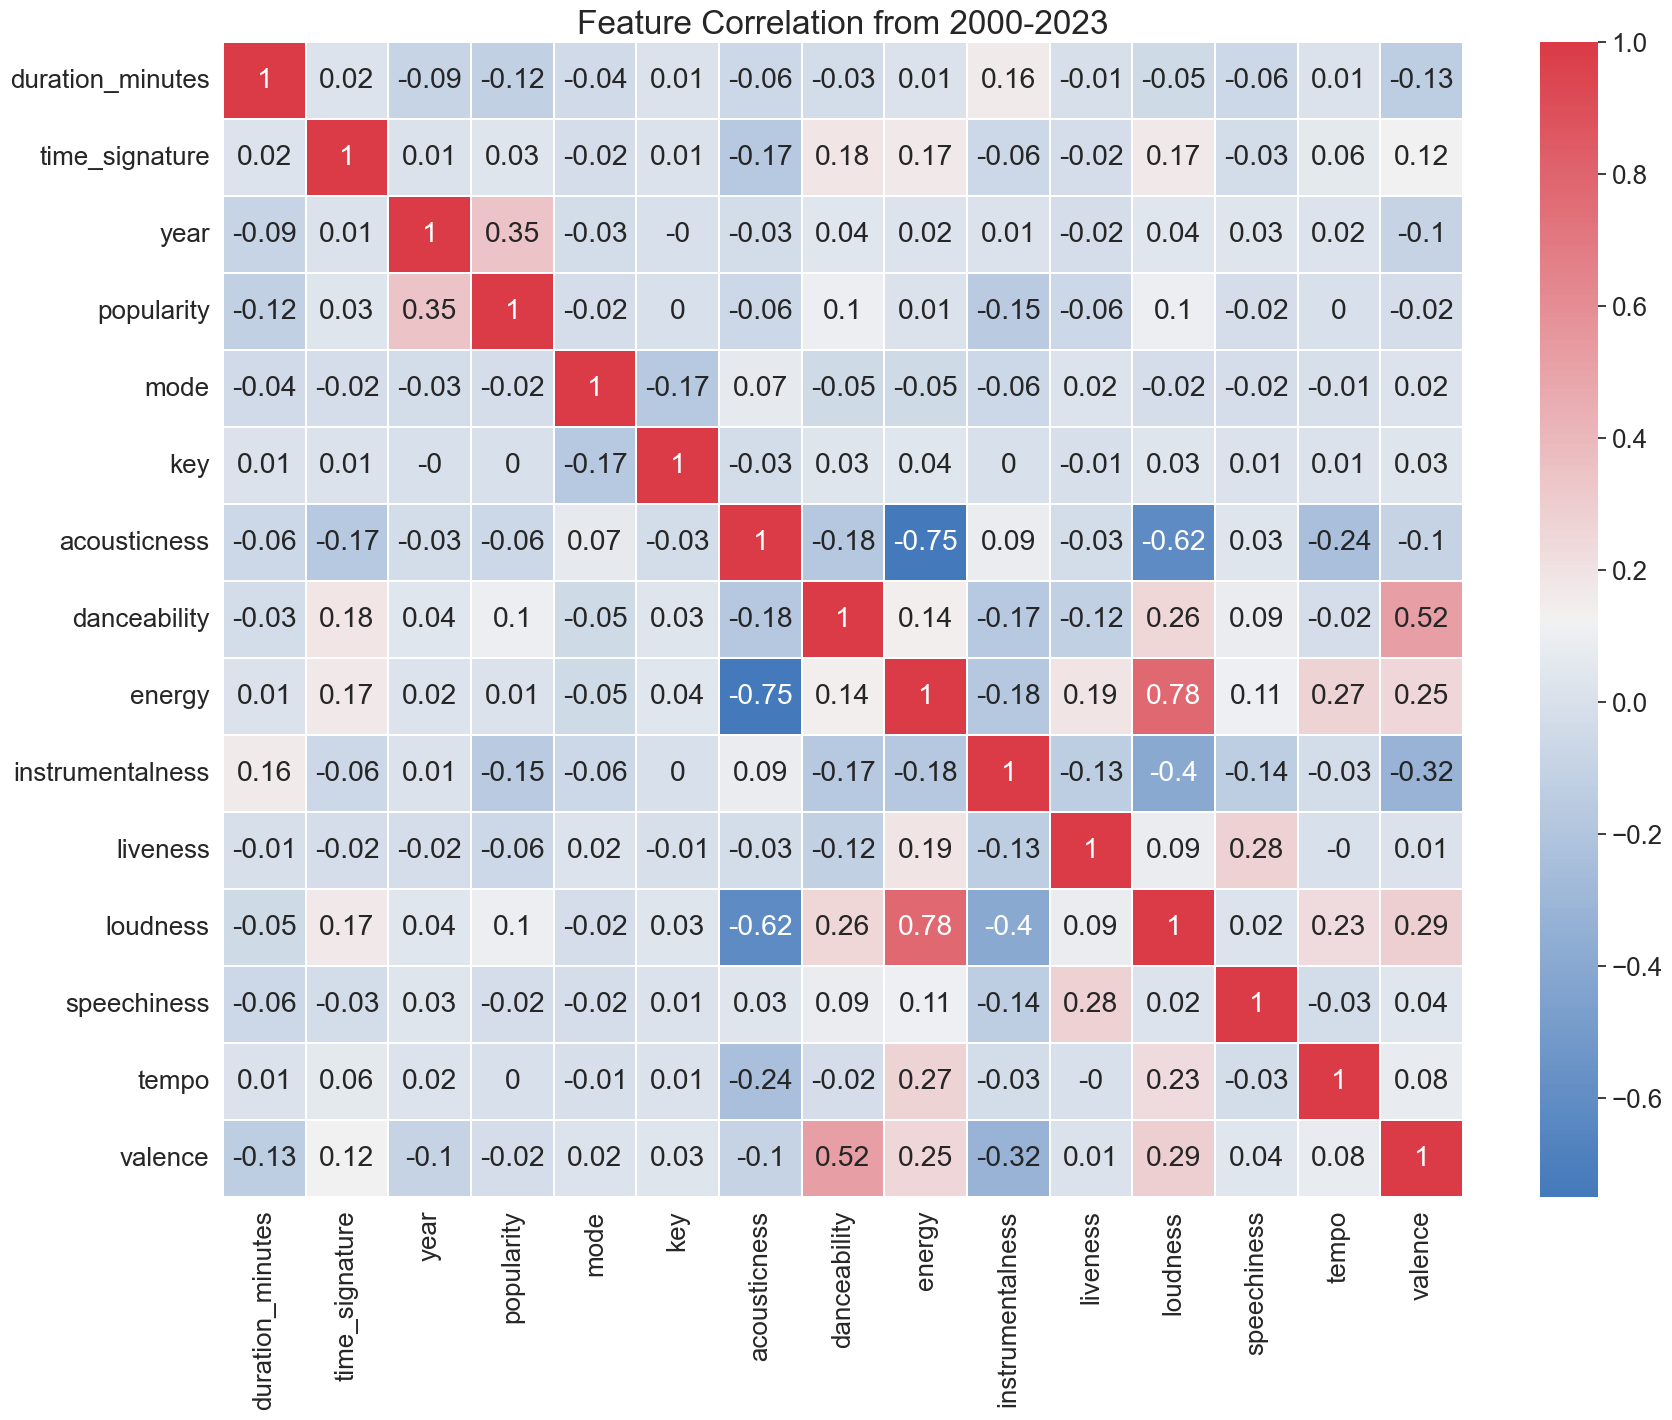

In [25]:
# Check out feature correlations of file_2000_2023_spotify dataframe
file_2000_2023_spotify_heatmap = file_2000_2023_spotify.select_dtypes(['float64', 'int64'])

sns.set(font_scale=1.7)
plt.subplots(figsize=(20,15))
sns.heatmap(round(file_2000_2023_spotify_heatmap.corr(), 2), annot=True, linewidths=0.05, 
            cmap=sns.diverging_palette(250, 10, as_cmap=True))
plt.title('Feature Correlation from 2000-2023', fontsize=24)

**For the file_2000_2023_spotify dataframe, below are noteworthy correlations:**
- energy and loudness have a strong postive correlation of 0.78
- danceability and valence have a strong positive correlation of 0.52
- popularity and year have a medium positive correlation of 0.35
- loudness and valence have a small positive correlation of 0.29
- speechiness and liveness have a small positive correlation of 0.28
- energy and tempo have a small positive correlation of 0.27
- loudness and danceability have a small positive correlation of 0.26
- energy and valence have a small positive correlation of 0.25
- loudness and tempo have a small positive correlation of 0.23
- Acousticness and energy have a strong negative correlation of -0.75
    - Makes sense given acoustic music is not known for having high energy
- Acousticness and loudness have a strong negative correlation of -0.62
    - Makes sense given acoustic music is not known for being loud

\
I thought the correlations would be stronger but in a way, it makes sense given the scale of data in play. 

Text(0.5, 1.0, 'Feature Correlation from 1921-1999')

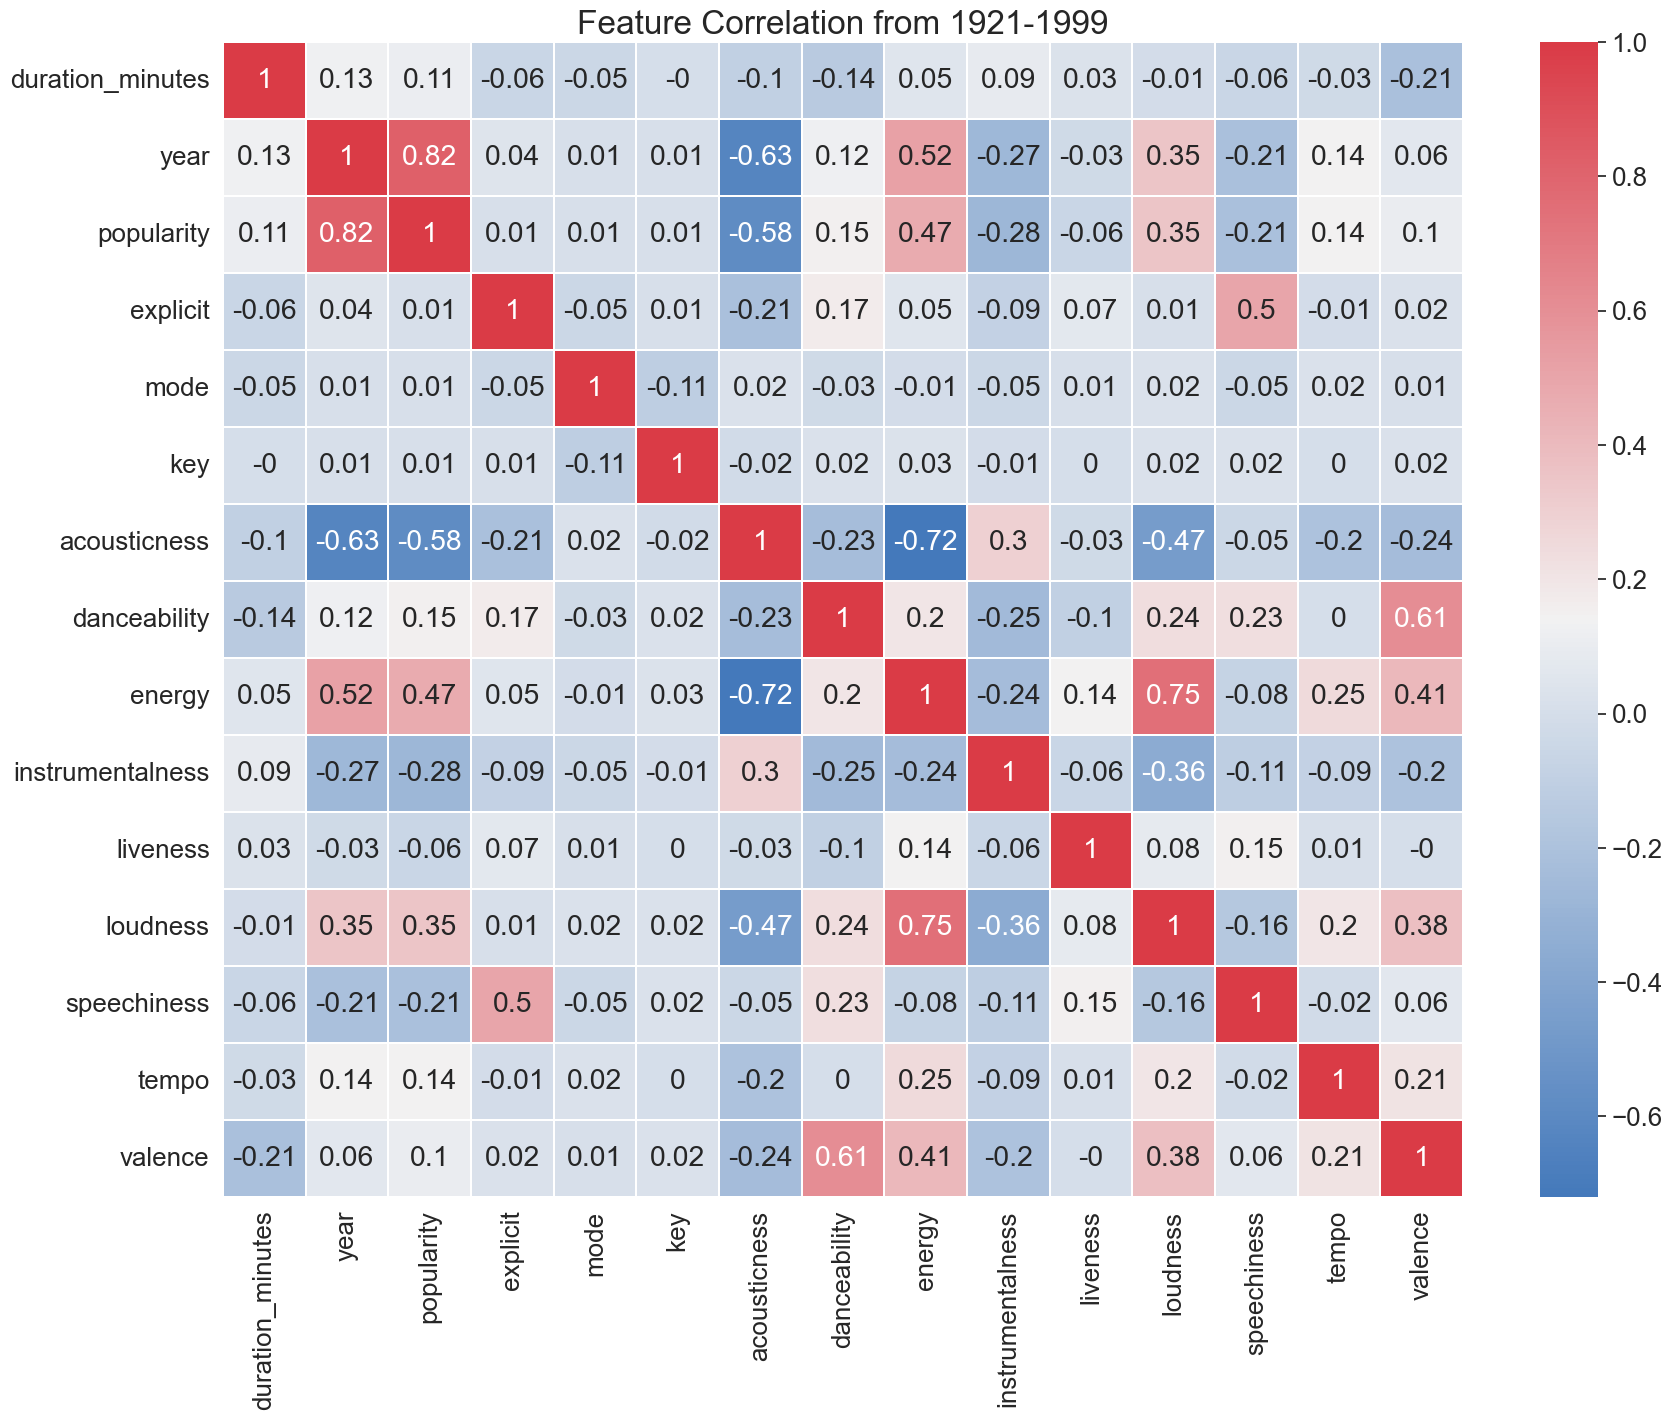

In [26]:
# Check out feature correlations of file_1921_1999 spotify dataframe
file_1921_1999_spotify_heatmap = file_1921_1999_spotify.select_dtypes(['float64', 'int64'])

sns.set(font_scale=1.7)
plt.subplots(figsize=(20,15))
sns.heatmap(round(file_1921_1999_spotify_heatmap.corr(), 2), annot=True, linewidths=0.05,
           cmap=sns.diverging_palette(250, 10, as_cmap=True))
plt.title('Feature Correlation from 1921-1999', fontsize=24)

**For the file_1921_1999_spotify dataframe:**
- popularity and year have a medium positive correlation of 0.88 check
- energy and loudness have a strong postive correlation of 0.78 check
- danceability and valence have a strong positive correlation of 0.56 check
- energy and year have a strong positive correlation of 0.53 check
- energy and popularity have a strong positive correlation of 0.50 check
- year and loudness have a medium positive correlation of 0.49 check
- popularity and loudness have a medium positive correlation of 0.47 check
- speechiness and explicit have a small positive correlation of 0.41 check
- energy and valence have a small positive correlation of 0.35 check
- instrumentalness and acousticness have a small positive correlation of 0.34 check
- loudness and valence have a small positive correlation of 0.31 check
- loudness and danceability have a small positive correlation of 0.29 check
- energy and tempo have a small positive correlation of 0.25 check
- explicit and danceability have a small positive correlation of 0.24 check
- speechiness and danceability have a small positive correlation of 0.23 check
- energy and danceability have a small positive correlation of 0.22 check
- loudness and tempo have a small positive correlation of 0.21 check
- danceability and year have a small positive correlation of 0.20 check

\
The correlations of this dataframe are stronger than the file_2000_2023_spotify dataframe. Perhaps that's due to the nearly 80 years worth of data... which is close to 60 years worth more?

(array([-25.,   0.,  25.,  50.,  75., 100., 125.]),
 [Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125')])

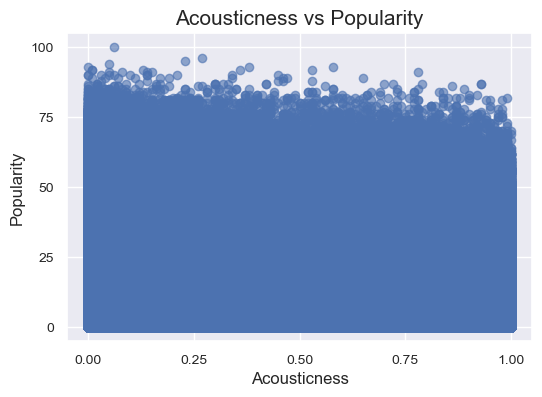

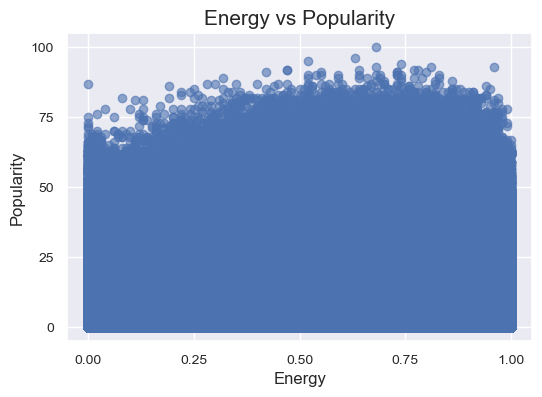

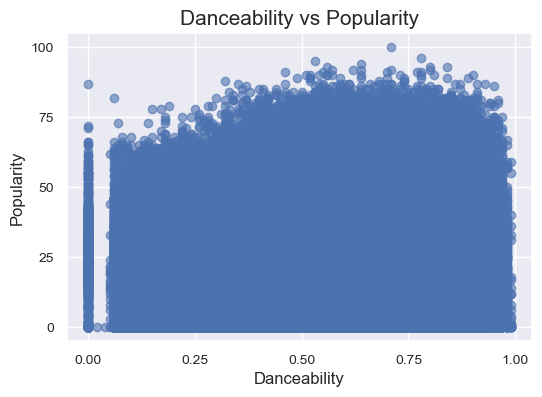

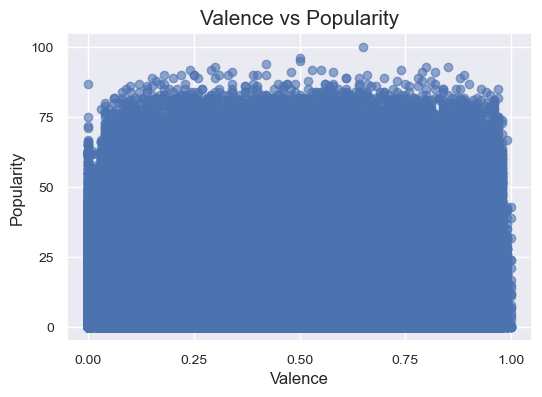

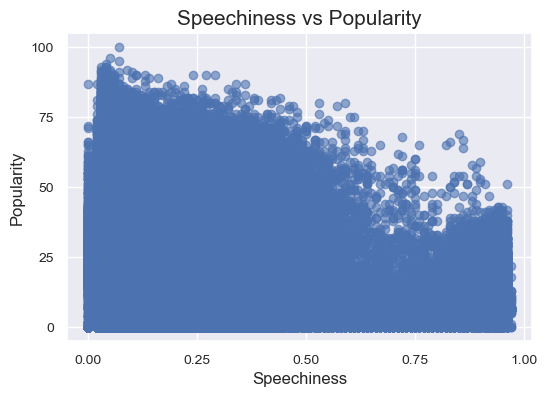

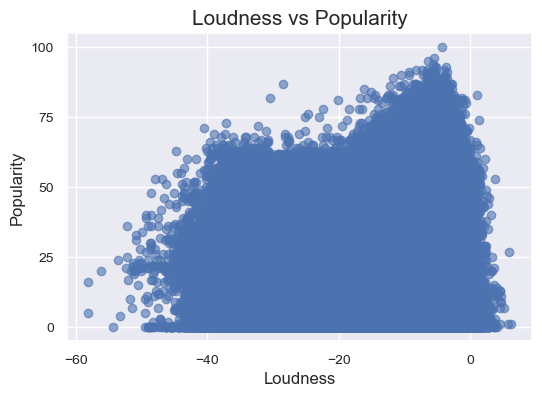

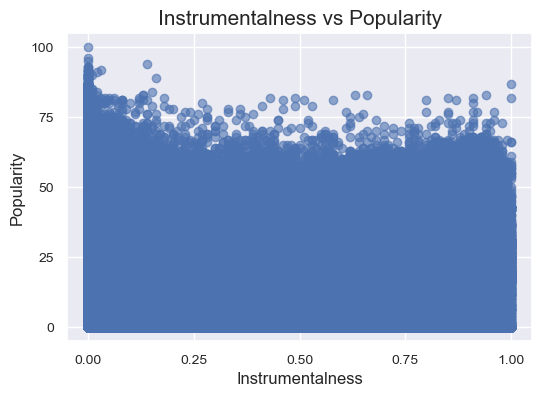

In [27]:
# Scatter plot popularity comparisons of key features for the file_2000_2023_spotify dataframe
plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['acousticness'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Acousticness vs Popularity', fontsize=15)
plt.xlabel('Acousticness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['energy'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Energy vs Popularity', fontsize=15)
plt.xlabel('Energy', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['danceability'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Danceability vs Popularity', fontsize=15)
plt.xlabel('Danceability', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['valence'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Valence vs Popularity', fontsize=15)
plt.xlabel('Valence', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['speechiness'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Speechiness vs Popularity', fontsize=15)
plt.xlabel('Speechiness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['loudness'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Loudness vs Popularity', fontsize=15)
plt.xlabel('Loudness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['instrumentalness'], file_2000_2023_spotify['popularity'], alpha=0.6)
plt.title('Instrumentalness vs Popularity', fontsize=15)
plt.xlabel('Instrumentalness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

While focusing on track's/genre's respective popularities, key insights were found. The following analysis is from an "on average" perspective. The less acoustic, the more popular a track/genre is. Though, acousticness's impact on popularity is not strong. Energy's popularity sweet spot, which is measured between 0-1, hovers around 0.50-0.75. The more danceable a track/genre, the more popular... 0.55-0.75 is the sweet spot. Valence is not a strong predictor of popularity while on the other hand, speechiness is. The less speechiness, the more popular (sweet spot is 0-0.10). Loudness also is a strong predictor of popularity as its sweet spot is -15 to -5 dBs. Lastly, instrumentalness is like valence where it's not a strong predictor of popularity, though, an instrumentalness of 0 is most popular.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

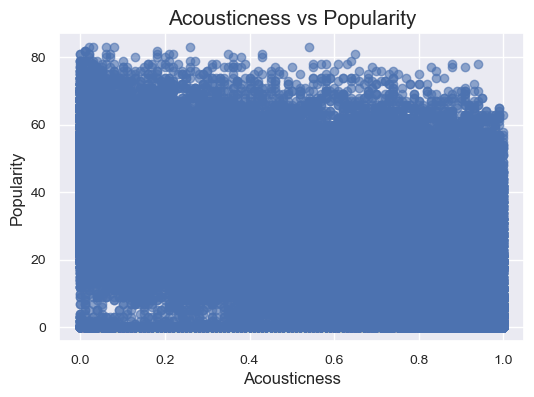

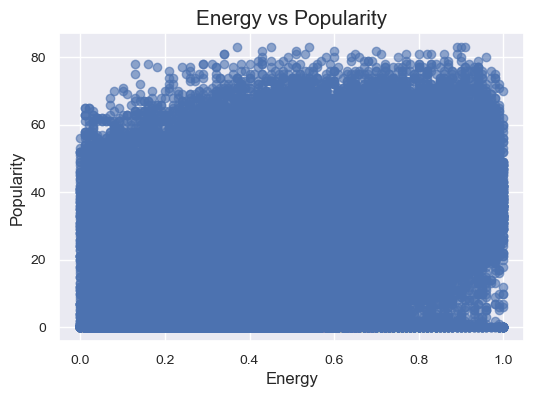

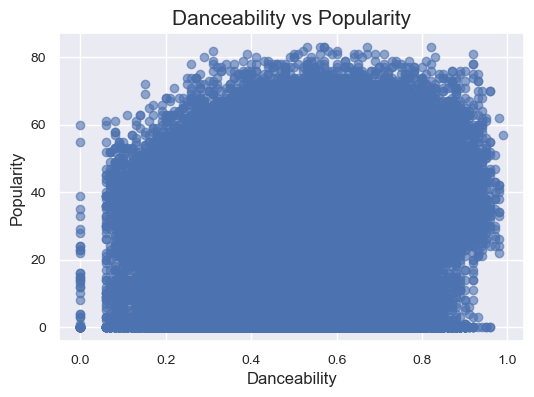

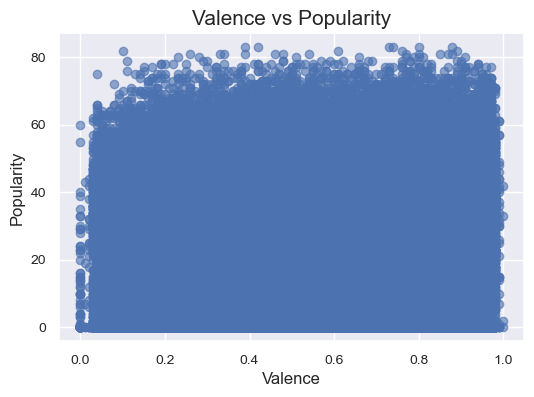

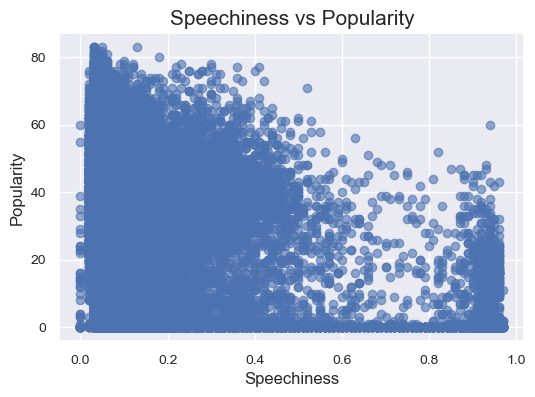

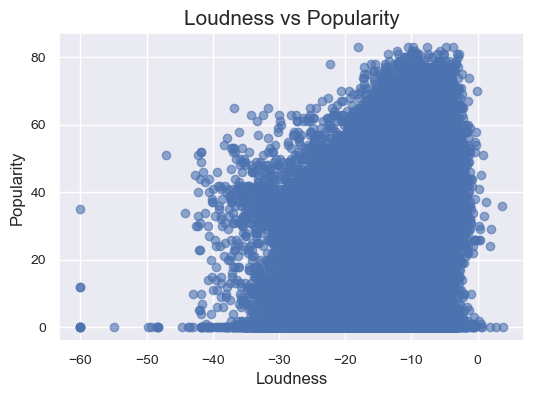

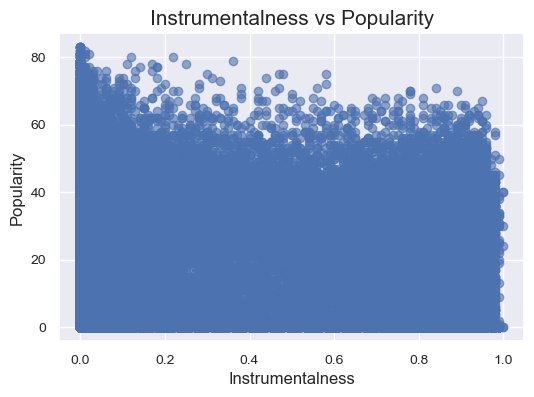

In [48]:
# Scatter plot popularity comparisons of key features for the file_1921_1999_spotify dataframe
plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['acousticness'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Acousticness vs Popularity', fontsize=15)
plt.xlabel('Acousticness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['energy'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Energy vs Popularity', fontsize=15)
plt.xlabel('Energy', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['danceability'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Danceability vs Popularity', fontsize=15)
plt.xlabel('Danceability', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['valence'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Valence vs Popularity', fontsize=15)
plt.xlabel('Valence', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['speechiness'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Speechiness vs Popularity', fontsize=15)
plt.xlabel('Speechiness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['loudness'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Loudness vs Popularity', fontsize=15)
plt.xlabel('Loudness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1921_1999_spotify['instrumentalness'], file_1921_1999_spotify['popularity'], alpha=0.6)
plt.title('Instrumentalness vs Popularity', fontsize=15)
plt.xlabel('Instrumentalness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

While focusing on track's/genre's respective popularities, key insights were found. The following analysis is from an "on average" perspective. The less acoustic, the more popular a track/genre is. Though, acousticness's impact on popularity is not strong. Energy's popularity sweet spot, which is measured between 0-1, hovers around 0.65-0.95 which is greater than the file_2000_2023_spotify dataframe. The more danceable a track/genre, the more popular... 0.55-0.75 is the sweet spot just like the file_2000_2023_spotify dataframe. Valence is not a strong predictor of popularity while on the other hand, speechiness is. The less speechiness, the more popular (sweet spot is 0-0.05). Loudness also is a strong predictor of popularity as its sweet spot is -15 to -5 dBs. Lastly, instrumentalness is like valence where it's not a strong predictor of popularity, though, an instrumentalness of 0 is most popular.

In [28]:
# Show the number of tracks with a popularity of 0 - file_2000_2023_spotify dataframe
popularity_of_0_2000_2023 = len(file_2000_2023_spotify.query('popularity ==0'))
print('The number of tracks with a populariy of 0 is:', popularity_of_0_2000_2023)

print('The number of tracks in the file is:', len(file_2000_2023_spotify))

print('The percentage of tracks with a popularity of 0 is:', round(popularity_of_0_2000_2023/1159764, 2))

The number of tracks with a populariy of 0 is: 158391
The number of tracks in the file is: 1159764
The percentage of tracks with a popularity of 0 is: 0.14


In [29]:
# Show the number of tracks with a popularity of 0 - file_1921_1999_spotify dataframe
popularity_of_0_1921_1999 = len(file_1921_1999_spotify.query('popularity ==0'))
print('The number of tracks with a populariy of 0 is:', popularity_of_0_1921_1999)

print('The number of tracks in the file is:', len(file_1921_1999_spotify))

print('The percentage of tracks with a popularity of 0 is:', round(popularity_of_0_1921_1999/169909, 2))

The number of tracks with a populariy of 0 is: 27279
The number of tracks in the file is: 128253
The percentage of tracks with a popularity of 0 is: 0.16


Text(0, 0.5, 'Number of Tracks')

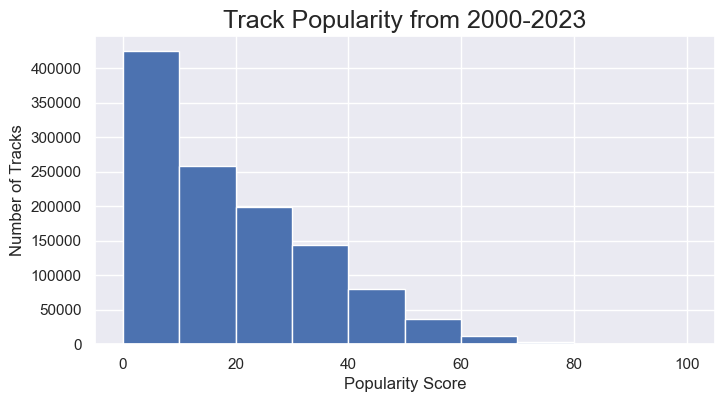

In [30]:
# Histogram of track popularity for the file_2000_2023_spotify dataframe
sns.set()
plt.figure(figsize=(8, 4))
plt.hist(file_2000_2023_spotify['popularity'])
plt.title('Track Popularity from 2000-2023', fontsize=18)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')

We see that the vast majority of track popularity score quite low with only a fraction scoring above 50.

Text(0, 0.5, 'Number of Tracks')

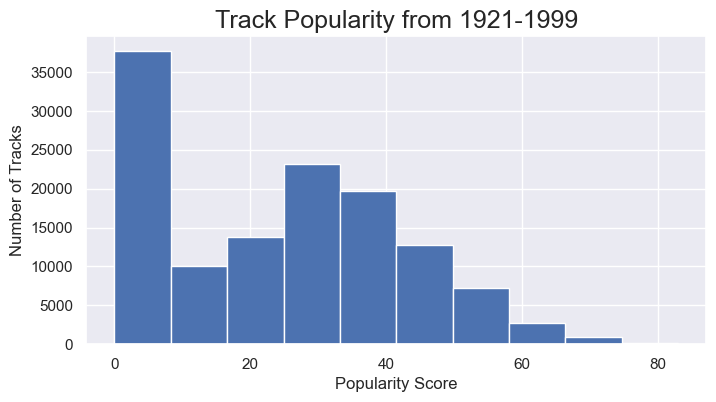

In [32]:
# Histogram of track popularity for the file_1921_1999_spotify dataframe
sns.set()
plt.figure(figsize=(8, 4))
plt.hist(file_1921_1999_spotify['popularity'])
plt.title('Track Popularity from 1921-1999', fontsize=18)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')

We see that the vast majority of track popularity score quite low with only a fraction scoring above 50.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

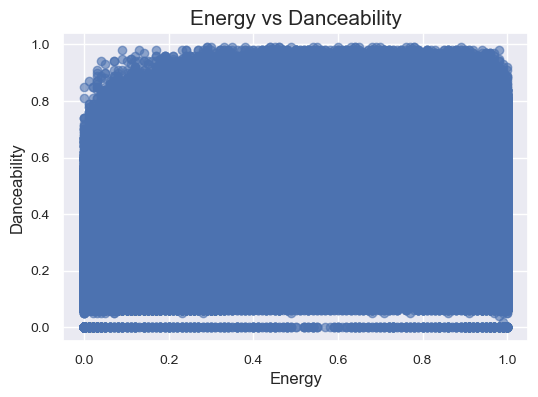

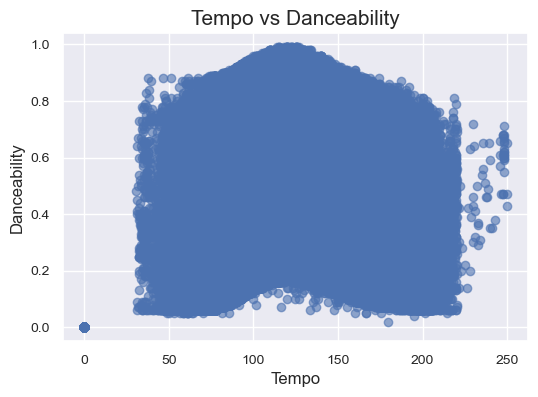

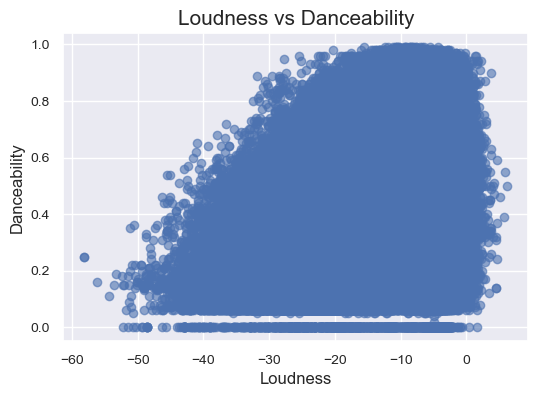

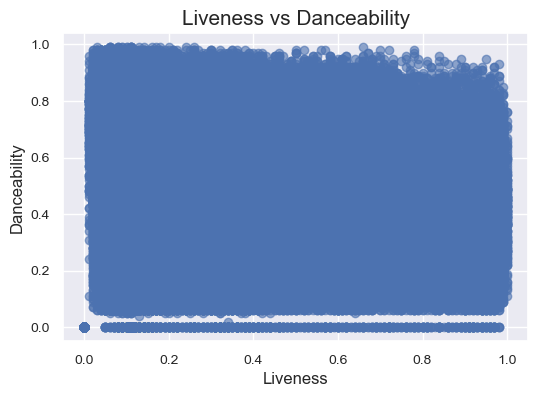

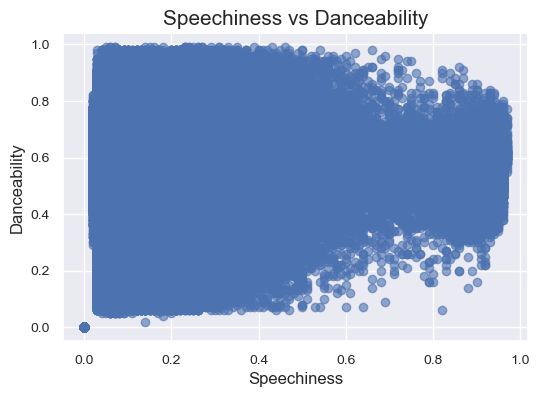

In [33]:
# Scatter plot danceability comparisons of key features for the file_2000_2023_spotify dataframe
# I elected to create these scatter plots for only this dataframe given the volume of data it possesses
plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['energy'], file_2000_2023_spotify['danceability'], alpha=0.6)
plt.title('Energy vs Danceability', fontsize=15)
plt.xlabel('Energy', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['tempo'], file_2000_2023_spotify['danceability'], alpha=0.6)
plt.title('Tempo vs Danceability', fontsize=15)
plt.xlabel('Tempo', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['loudness'], file_2000_2023_spotify['danceability'], alpha=0.6)
plt.title('Loudness vs Danceability', fontsize=15)
plt.xlabel('Loudness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['liveness'], file_2000_2023_spotify['danceability'], alpha=0.6)
plt.title('Liveness vs Danceability', fontsize=15)
plt.xlabel('Liveness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_2000_2023_spotify['speechiness'], file_2000_2023_spotify['danceability'], alpha=0.6)
plt.title('Speechiness vs Danceability', fontsize=15)
plt.xlabel('Speechiness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

Taking a look at what makes a dance "danceable," energy and liveness aren't strong predictors but tempo, loudness, and speechiness are. The sweet spot for tempo is around 100-130 BPMs while the sweet spot for loudness is -20 to 0 dBs, and the sweet spot for speechiness is 0-0.60.

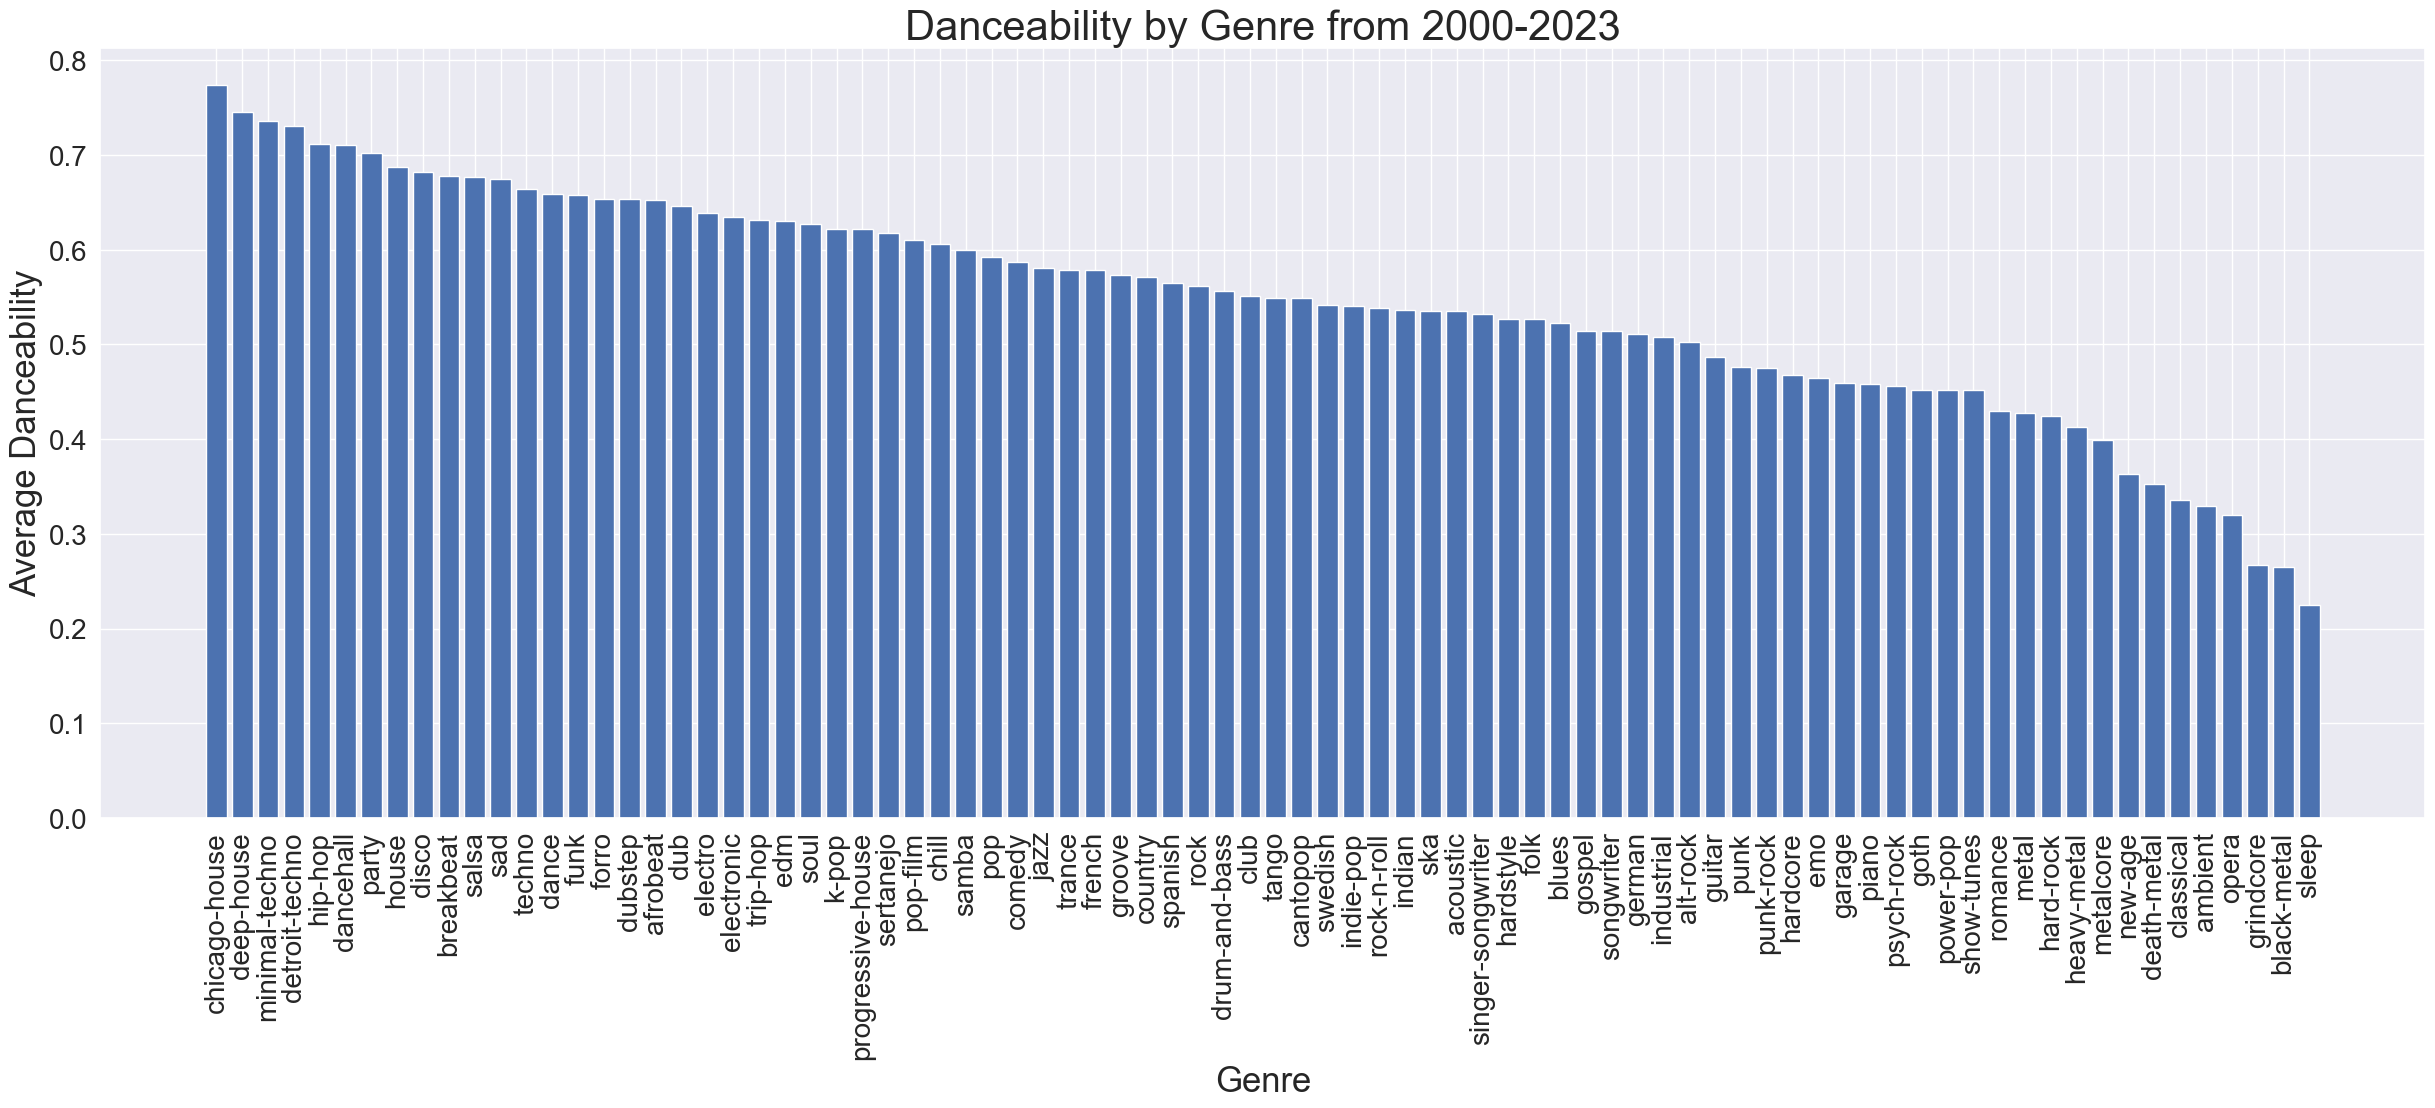

In [34]:
# One last look into danceability... Which genres lead and lag the rest (using the file_2000_2023_spotify dataframe)?
plt.figure(figsize=(30, 10))
genre_danceability = file_2000_2023_spotify.groupby('genre')['danceability'].mean().sort_values(ascending=False)
plt.bar(genre_danceability.index, genre_danceability.values)
plt.subplots_adjust(hspace=25, wspace=50)
plt.title('Danceability by Genre from 2000-2023', fontsize=30)
plt.xlabel('Genre', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('Average Danceability', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

Unsurprisingly, techno and house genres score highly as does house and party while sleep ranks last. Surprisingly, sad music ranks high!

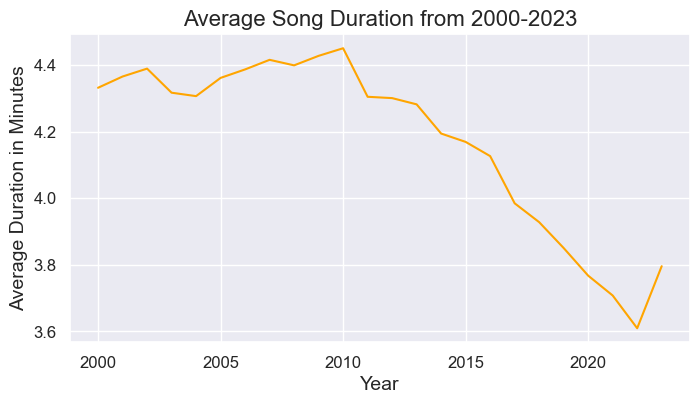

In [35]:
# Visualize average track_duration from 2000-2023 for the file_2000_2023_spotify dataframe
plt.figure(figsize=(8, 4))
track_duration_over_time = file_2000_2023_spotify.groupby('year')['duration_minutes'].mean()
sns.lineplot(x=track_duration_over_time.index, y=track_duration_over_time.values, color='orange')
plt.title('Average Song Duration from 2000-2023', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Duration in Minutes', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

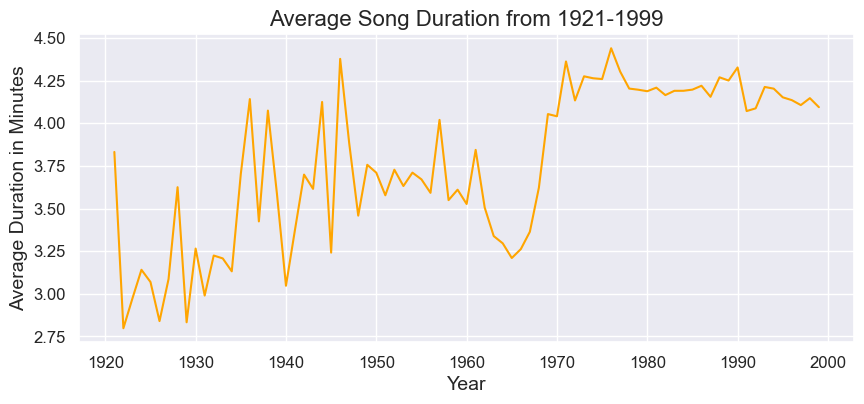

In [36]:
# Visualize average track_duration from 1921-1999 for the file_1921_1999_spotify dataframe
plt.figure(figsize=(10, 4))
track_duration_over_time_2 = file_1921_1999_spotify.groupby('year')['duration_minutes'].mean()
sns.lineplot(x=track_duration_over_time_2.index, y=track_duration_over_time_2.values, color='orange')
plt.title('Average Song Duration from 1921-1999', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Duration in Minutes', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

 While I dove into this in the SQL EDA portion above, visualizing the year-over-year change in average song duration can be more effective in comprehending the trend.

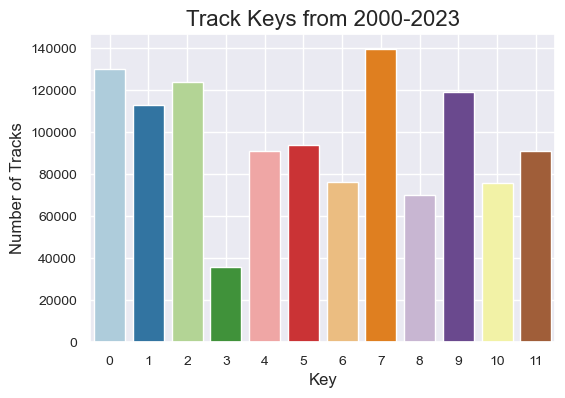

In [37]:
# Let's look at the track keys of the file_2000_2023_spotify dataframe. Perhaps there's a trend?
plt.figure(figsize=(6, 4))
keys_barplot = file_2000_2023_spotify['key'].value_counts()
sns.barplot(x=keys_barplot.index, y=keys_barplot.values, palette='Paired')
plt.title('Track Keys from 2000-2023', fontsize=16)
plt.xlabel('Key', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Number of Tracks', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

Key 7 leads the way in frequency with keys 0, 2, and 3 closely behind. Key 3 lags far behind the rest of the keys. The more popular keys must be a sign of where modern day music has evolved into.

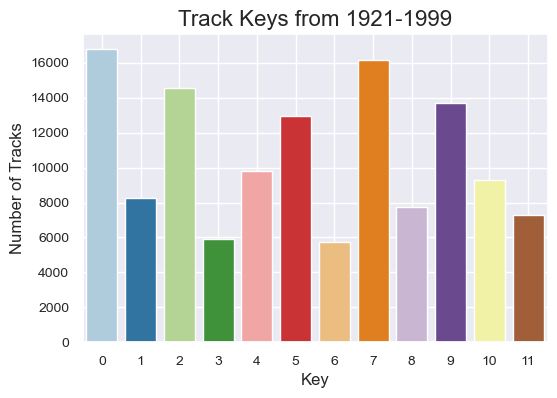

In [38]:
# Let's look at the track keys of the file_1921_1999_spotify dataframe. Perhaps there's a trend?
plt.figure(figsize=(6, 4))
keys_barplot_2 = file_1921_1999_spotify['key'].value_counts()
sns.barplot(x=keys_barplot_2.index, y=keys_barplot_2.values, palette='Paired')
plt.title('Track Keys from 1921-1999', fontsize=16)
plt.xlabel('Key', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Number of Tracks', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

Key 0 leads the way in frequency with keys 7 and 2 closely behind. Key 3 once again lags behind the rest of the keys.

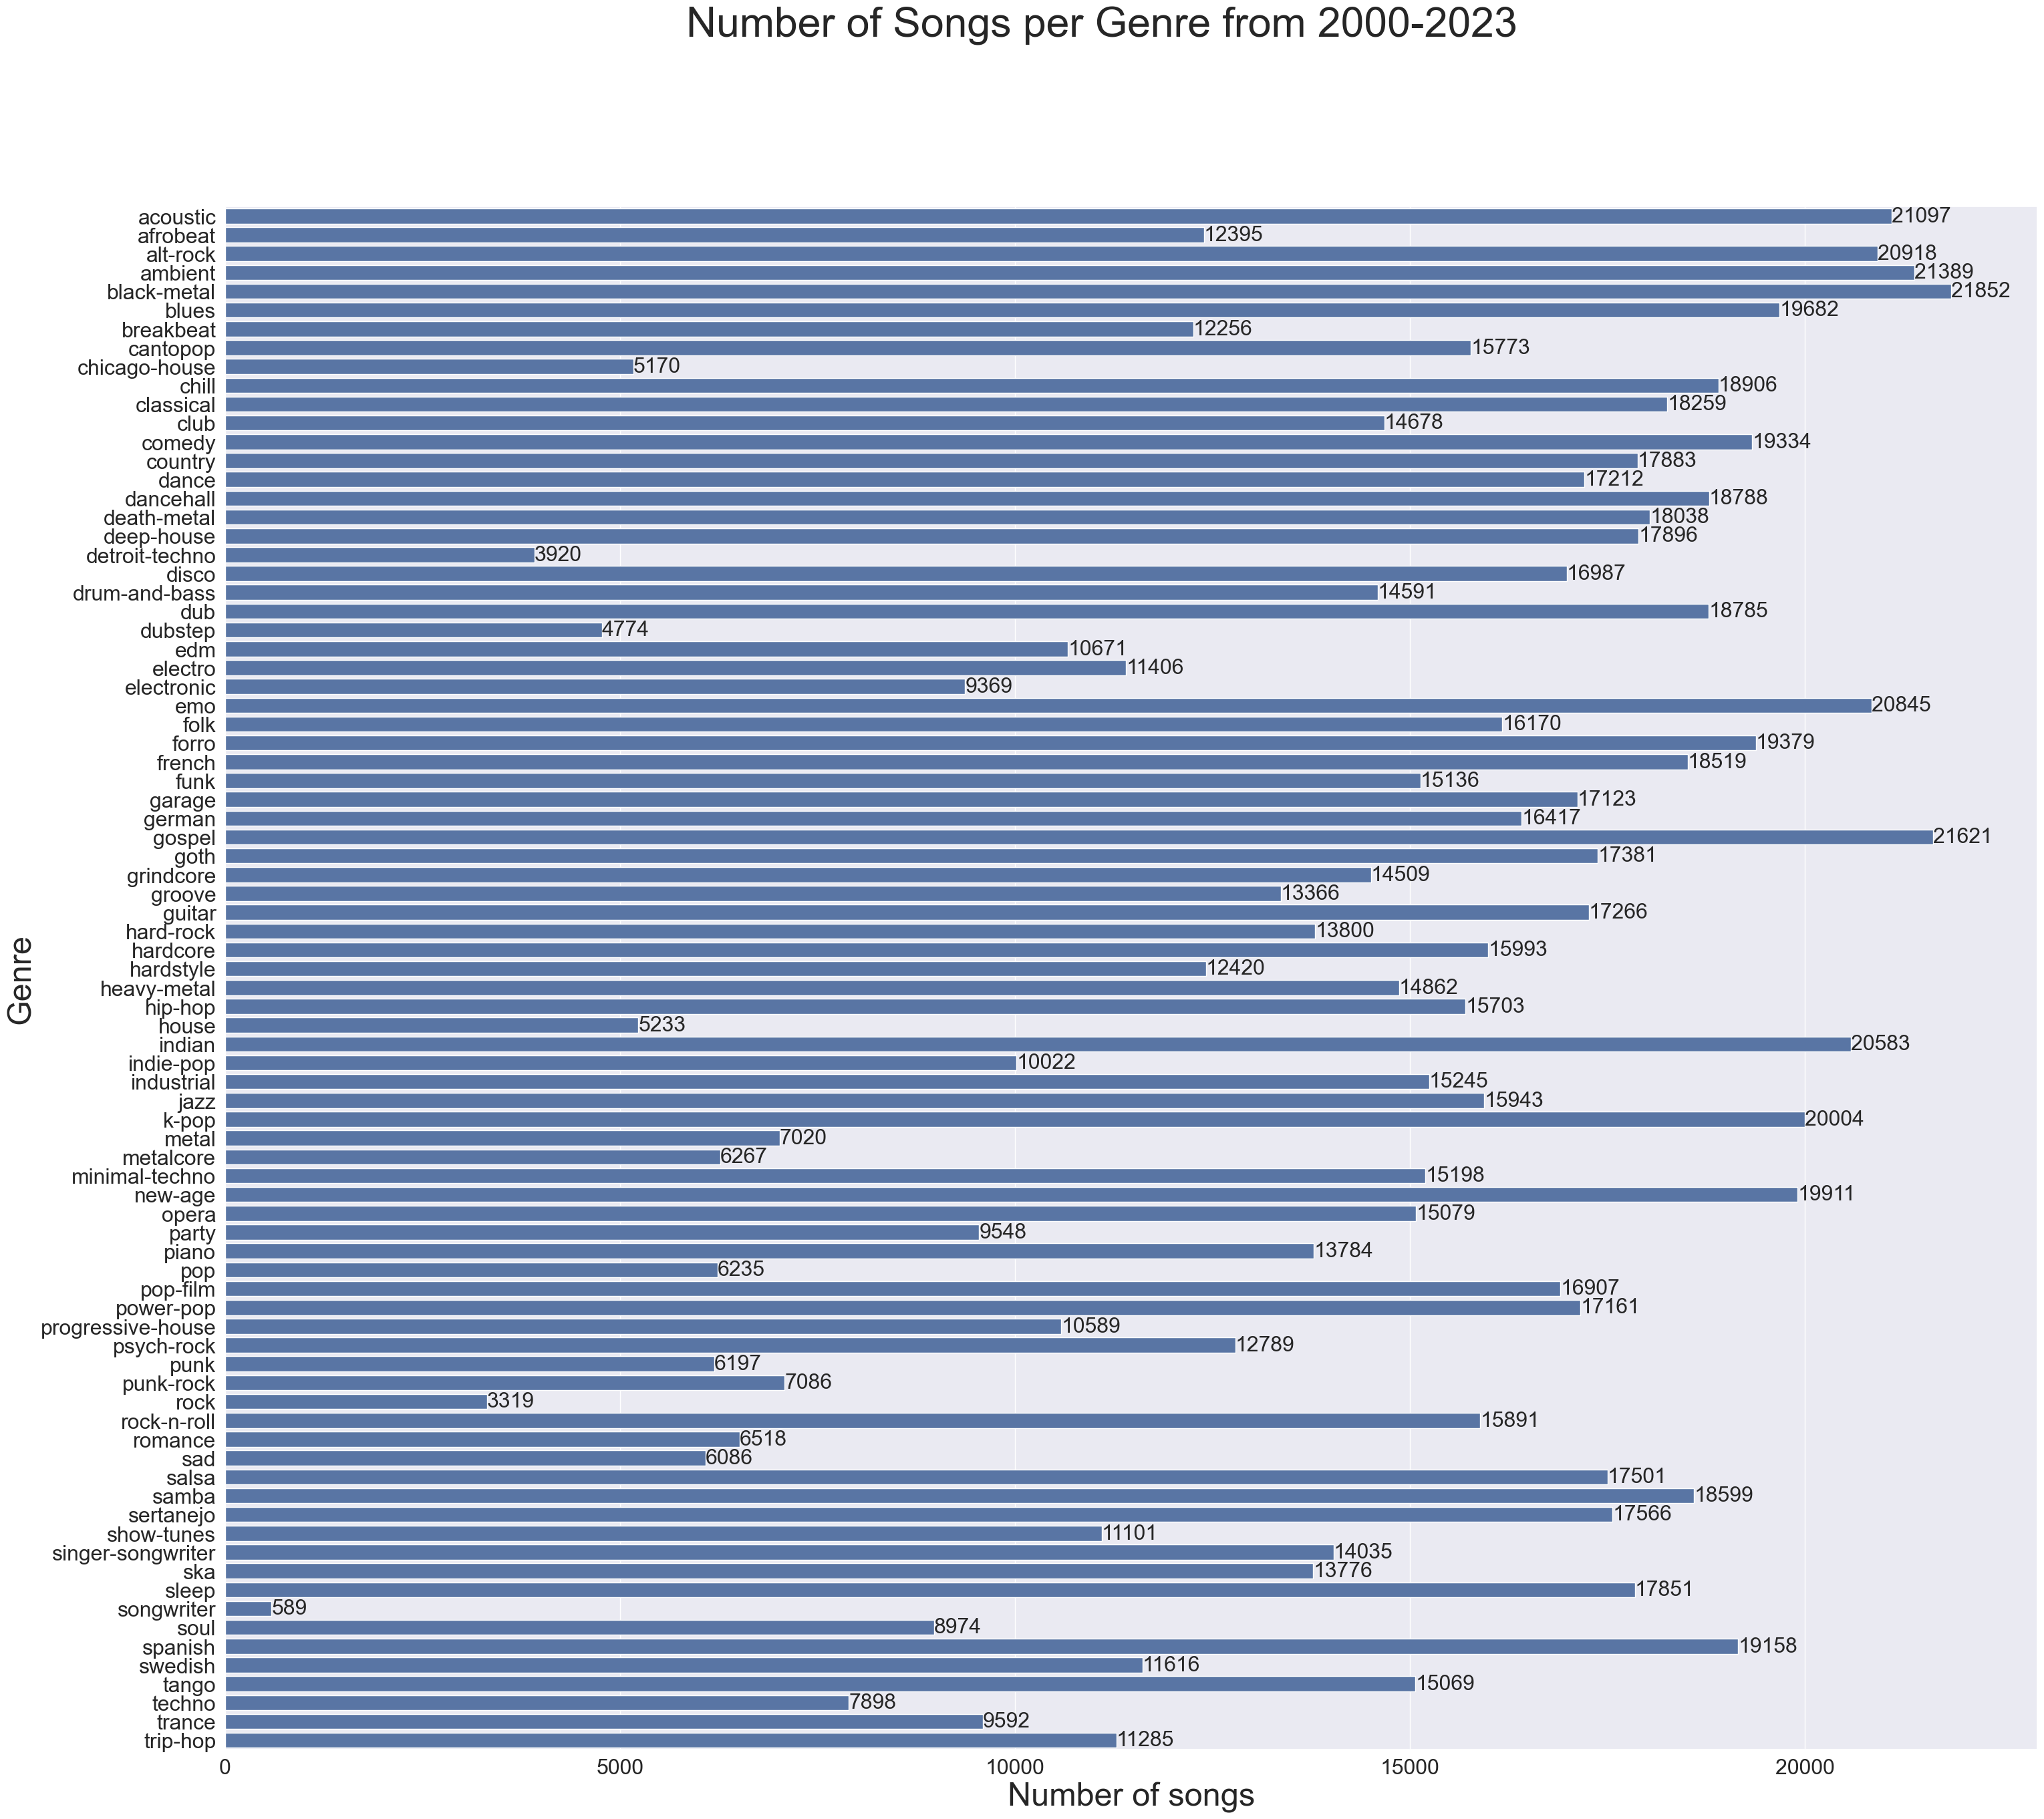

In [39]:
# Visualize count chart to see number of songs per genre in the file_2000_2023_spotify dataframe
fig, axes = plt.subplots(figsize = (35, 30))
fig.subplots_adjust(hspace=25, wspace=25)
fig.suptitle('Number of Songs per Genre from 2000-2023', fontsize=45)
sns.countplot(y='genre', data=file_2000_2023_spotify, width=0.8)
axes.xaxis.set_tick_params(labelsize=23)
axes.yaxis.set_tick_params(labelsize=23)
plt.xlabel('Number of songs', fontsize=35)
plt.ylabel('Genre', fontsize=35)
for container in axes.containers:
    axes.bar_label(container, fontsize=23)

I've looked at both dataframes features more high level, but I haven't looked into the most popular artists for each dataframe... time to dig in!

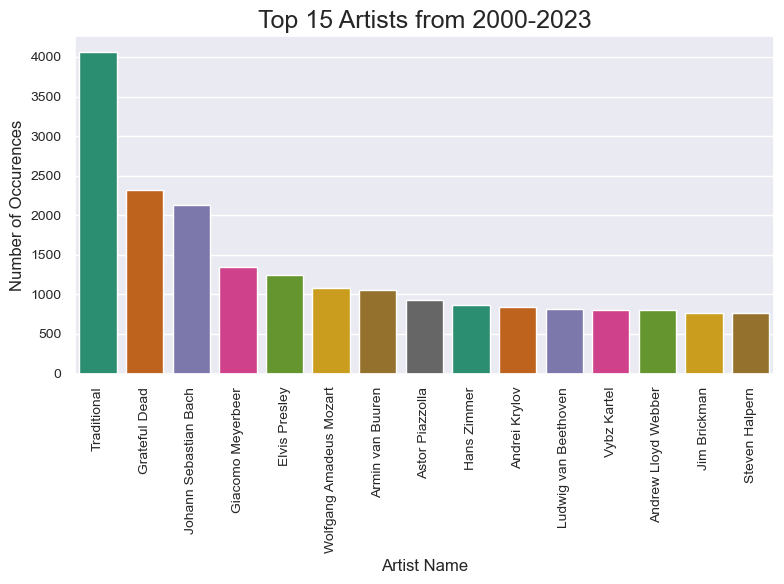

In [40]:
# Top 15 artists for the file_2000_2023_spotify dataframe
top_artist_2000_2023_spotify = file_2000_2023_spotify['artist_name'].value_counts().head(15)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_artist_2000_2023_spotify.index, y=top_artist_2000_2023_spotify.values, palette='Dark2')
plt.title('Top 15 Artists from 2000-2023', fontsize=18)
plt.xlabel('Artist Name', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Occurences', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

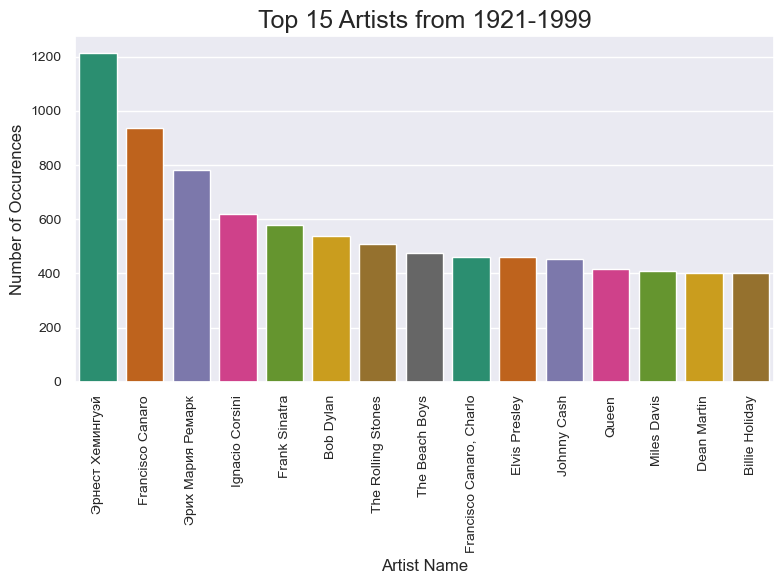

In [41]:
# Top 15 artists for the file_1921_1999_spotify dataframe
top_artist_1921_1999_spotify = file_1921_1999_spotify['artist_name'].value_counts().head(15)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_artist_1921_1999_spotify.index, y=top_artist_1921_1999_spotify.values, palette='Dark2')
plt.title('Top 15 Artists from 1921-1999', fontsize=18)
plt.xlabel('Artist Name', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Occurences', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

As expected given the dataframes respective varying scales, we see very little overlap between the dataframes with the exception of Johnny Cash. 